In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
os.chdir(r"C:\Users\Dan Masibo\Documents\Python Projects\Sales")

In [6]:
df=pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df.shape

(303, 14)

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective heart

0 --> Healthy heart

Splitting the Features and Target

In [20]:
X=df.drop(columns='target', axis=1)
y=df['target']

In [58]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [66]:
X=pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-6.738127,-11.454953,-1.840706,-7.972670,-4.852956,135.548677,-26.763392,-6.843373,-26.496752,-2.311624,-37.628804,-3.428734,-52.069237
1,-6.738551,-11.454953,-2.701859,-7.972679,-4.852956,-40.297363,-1.688435,-6.843367,-26.496752,-1.738209,-37.628804,-3.428734,-40.351298
2,-6.738486,-57.333452,-3.563012,-7.972679,-4.852956,-40.297363,-26.763392,-6.843370,-26.496752,-2.741685,-14.934409,-3.428734,-40.351298
3,-6.738241,-11.454953,-3.563012,-7.972685,-4.852956,-40.297363,-1.688435,-6.843369,-26.496752,-3.028393,-14.934409,-3.428734,-40.351298
4,-6.738225,-57.333452,-4.424165,-7.972685,-4.852956,-40.297363,-1.688435,-6.843371,17.563780,-3.123962,-14.934409,-3.428734,-40.351298


In [71]:
display(X.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-6.738127,-11.454953,-1.840706,-7.972670,-4.852956,135.548677,-26.763392,-6.843373,-26.496752,-2.311624,-37.628804,-3.428734,-52.069237
1,-6.738551,-11.454953,-2.701859,-7.972679,-4.852956,-40.297363,-1.688435,-6.843367,-26.496752,-1.738209,-37.628804,-3.428734,-40.351298
2,-6.738486,-57.333452,-3.563012,-7.972679,-4.852956,-40.297363,-26.763392,-6.843370,-26.496752,-2.741685,-14.934409,-3.428734,-40.351298
3,-6.738241,-11.454953,-3.563012,-7.972685,-4.852956,-40.297363,-1.688435,-6.843369,-26.496752,-3.028393,-14.934409,-3.428734,-40.351298
4,-6.738225,-57.333452,-4.424165,-7.972685,-4.852956,-40.297363,-1.688435,-6.843371,17.563780,-3.123962,-14.934409,-3.428734,-40.351298


In [72]:
display(y.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Splitting the Data into Training data & Test Data

In [73]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training

In [75]:
#instantiate the model
logreg=LogisticRegression(max_iter=1000)

In [76]:
# training the LogisticRegression model with training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [77]:
y_pred=logreg.predict(X_train)

In [78]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

## Model Evaluation

**Accuracy Score**

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
# Accuracy on Training data
print("Accuracy_Score:", round(accuracy_score(y_train, y_pred)*100, 2), '%')

Accuracy_Score: 85.95 %


In [81]:
# Accuracy on Test data

y_pred=logreg.predict(X_test)
print("Accuracy_score:", round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy_score: 77.05 %


## Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[21  7]
 [ 7 26]]


In [84]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

21 7 7 26


<AxesSubplot:>

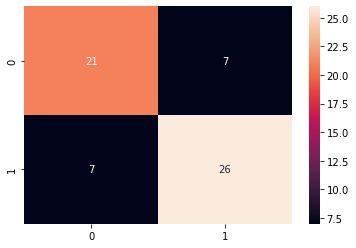

In [85]:
sns.heatmap(cf_matrix, annot=True)